In [1]:
#Data Preprocessing
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Load the datasets
customers = pd.read_csv("C:\\Users\\vijay\\Videos\\data science\\project\\Customers.csv")
products = pd.read_csv("C:\\Users\\vijay\\Videos\\data science\\project\\Products.csv")
transactions = pd.read_csv("C:\\Users\\vijay\\Videos\\data science\\project\\Transactions.csv")

# Convert 'SignupDate' and 'TransactionDate' to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Aggregate transaction data for each customer (total spend, number of transactions, etc.)
customer_transactions = transactions.groupby('CustomerID').agg(
    total_spend=('TotalValue', 'sum'),
    num_transactions=('TransactionID', 'count'),
    avg_purchase_value=('TotalValue', 'mean'),
    total_quantity=('Quantity', 'sum')
).reset_index()

# Merge customer profile data with the customer demographic info
customer_profile = pd.merge(customers, customer_transactions, on='CustomerID', how='left')

# Check for missing values and fill them if necessary
customer_profile.fillna(0, inplace=True)

# Standardize the numeric features (important for similarity calculation)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_profile[['total_spend', 'num_transactions', 'avg_purchase_value', 'total_quantity']])

# Add the scaled features back to the customer profile
customer_profile_scaled = pd.DataFrame(scaled_features, columns=['total_spend_scaled', 'num_transactions_scaled', 'avg_purchase_value_scaled', 'total_quantity_scaled'])
customer_profile = pd.concat([customer_profile, customer_profile_scaled], axis=1)

print(customer_profile.head())


C:\Users\vijay\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


  CustomerID        CustomerName         Region SignupDate  total_spend  \
0      C0001    Lawrence Carroll  South America 2022-07-10      3354.52   
1      C0002      Elizabeth Lutz           Asia 2022-02-13      1862.74   
2      C0003      Michael Rivera  South America 2024-03-07      2725.38   
3      C0004  Kathleen Rodriguez  South America 2022-10-09      5354.88   
4      C0005         Laura Weber           Asia 2022-08-15      2034.24   

   num_transactions  avg_purchase_value  total_quantity  total_spend_scaled  \
0               5.0             670.904            12.0           -0.051884   
1               4.0             465.685            10.0           -0.862714   
2               4.0             681.345            14.0           -0.393842   
3               8.0             669.360            23.0            1.035375   
4               3.0             678.080             7.0           -0.769499   

   num_transactions_scaled  avg_purchase_value_scaled  total_quantity_scal

In [2]:
#Calculate Similarity Scores
# Calculate Cosine Similarity between customers based on their profiles
similarity_matrix = cosine_similarity(customer_profile[['total_spend_scaled', 'num_transactions_scaled', 'avg_purchase_value_scaled', 'total_quantity_scaled']])

# Convert the similarity matrix into a DataFrame for easier interpretation
similarity_df = pd.DataFrame(similarity_matrix, index=customer_profile['CustomerID'], columns=customer_profile['CustomerID'])

# Display the similarity matrix for the first 10 customers
print(similarity_df.iloc[:10, :10])


CustomerID     C0001     C0002     C0003     C0004     C0005     C0006  \
CustomerID                                                               
C0001       1.000000  0.760051 -0.029016 -0.735326  0.711474 -0.421943   
C0002       0.760051  1.000000  0.519567 -0.651723  0.711698 -0.647505   
C0003      -0.029016  0.519567  1.000000 -0.437650  0.540188 -0.003952   
C0004      -0.735326 -0.651723 -0.437650  1.000000 -0.991677 -0.113885   
C0005       0.711474  0.711698  0.540188 -0.991677  1.000000  0.058088   
C0006      -0.421943 -0.647505 -0.003952 -0.113885  0.058088  1.000000   
C0007       0.349642  0.237867  0.456021 -0.865014  0.845394  0.579966   
C0008      -0.255829 -0.244482 -0.523446  0.832698 -0.819806 -0.558419   
C0009       0.892852  0.958458  0.361772 -0.779708  0.805445 -0.532243   
C0010       0.596194  0.969904  0.595421 -0.480726  0.564351 -0.729637   

CustomerID     C0007     C0008     C0009     C0010  
CustomerID                                          
C0001

In [5]:
import pandas as pd

# Assuming 'lookalike_df' has 59 columns, representing scores for lookalike comparisons
# Extract the top 3 lookalikes for each customer

# Function to get the top 3 lookalikes
def get_top_lookalikes(row):
    sorted_row = row.sort_values(ascending=False)  # Sort scores in descending order
    top_3 = sorted_row.head(3)  # Get top 3 lookalikes
    return top_3.index.tolist() + top_3.values.tolist()  # Return customer IDs and scores

# Apply the function across rows to get the top 3 lookalikes
lookalike_info = lookalike_df.apply(get_top_lookalikes, axis=1)

# Convert the results into a DataFrame
lookalike_result_df = pd.DataFrame(lookalike_info.tolist(), columns=['Lookalike1_ID', 'Lookalike2_ID', 'Lookalike3_ID', 'Score1', 'Score2', 'Score3'], index=lookalike_df.index)

# Now, you have a DataFrame with top 3 lookalikes and their scores
print(lookalike_result_df.head())

# Save the result to CSV
lookalike_result_df.to_csv('Top_Lookalikes.csv')



      Lookalike1_ID Lookalike2_ID Lookalike3_ID    Score1    Score2    Score3
C0001         C0164         C0103         C0137  0.994629  0.973084  0.967211
C0002         C0029         C0031         C0077  0.999516  0.997703  0.996394
C0010         C0029         C0094         C0002  0.974778  0.972862  0.969904
C0003         C0027         C0176         C0073  0.844287  0.839481  0.767941
C0004         C0075         C0175         C0195  0.997645  0.992250  0.991326


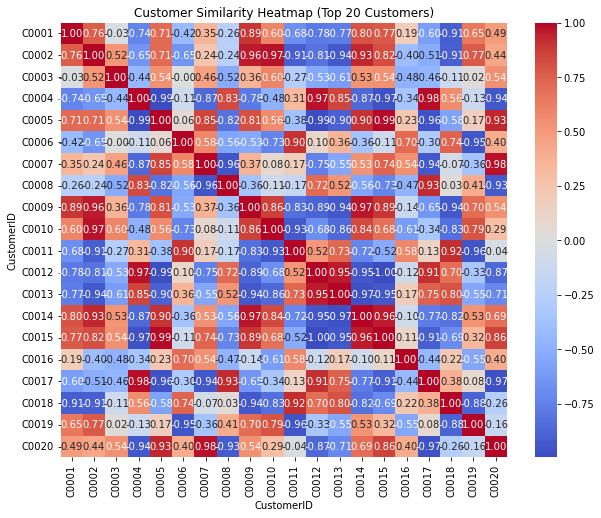

In [7]:
#Save and Visualize Results
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the customer similarity heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df.iloc[:20, :20], cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Customer Similarity Heatmap (Top 20 Customers)")
plt.show()